<a href="https://www.kaggle.com/code/jonasaacampos/an-lise-explorat-ria-do-sistema-de-vota-o-2022?scriptVersionId=121664719" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

[//]: # (Title: Análise exploratória do sistema de votação 2022)
[//]: # (Author: Jonas Campos)
[//]: # (Date: March 06, 2023)
[//]: # (Comment: Recontagem dos votos de uma urna para verificar a confiabilidade da urna eletrônica) 
[//]: # (Tags: #python, #eleicoes, #tse)  

[![](https://img.shields.io/badge/feito%20com%20%E2%9D%A4%20por-jaac-cyan)](https://github.com/jonasaacampos)
[![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-Profile-informational?style=flat&logo=linkedin&logoColor=white&color=0D76A8)](https://www.linkedin.com/in/jonasaacampos)

# Análise exploratória do sistema de votação 2022

> Atividade desenvolvida durante o Deafio Data Science da Escola de Britânica de Artes Criativas e Tecnologias - EBAC, ministrada por André Perez

> O projeto original foi realizado no ambiente do google colab, então fiz algumas alterações no código e compartilhei os dados utilizados para que esta análise possa ser replicada. Os dados originais também podem ser obtidos diretamente no site do TSE, que disponibilizei na seção Referências



## Contexto e motivação

Diversas teorias conspiratórias, fake news, documentos sem embasamento e laudos fraudados foram massivamente disseminados ao longo dos últimos anos.

Afinal, os dados apresentados pelo TSE são confiáveis? 

Neste estudo, faremos a recontagem de votos de uma única urna, a fim de determinarmos se os resultados do TSE podem ser replicados.

![](https://www.infomoney.com.br/wp-content/uploads/2019/06/urna-eletronica-3.jpg)




## Obtenção e upload dos dados

Os dados foram disponiblizados pelo TSE, e estão disponíveis [neste link](https://resultados.tse.jus.br/oficial/app/index.html#/eleicao;e=e545;uf=sp;ufbu=sp;mubu=70831;zn=0122;se=0009/dados-de-urna/rdv).

Estes dados contém registros criptografados de uma única urna.
Após o download, foi realizado o upload para um diretório virtual para futuras análises.

In [19]:
# comandos necessários para permitir o acesso do notebook aos dados armazenados no goole drive
# Desnecessário dentro do ambiente atual. resolvi manter o código para fins didáticos

#from google.colab import drive
#drive.mount('/content/drive')


# arquivo_rdv_raw_criptografado = "/content/drive/MyDrive/02-ESTUDOS/Data-Science/eleicoes-2022/data/raw/o00407-7083101220009.rdv"
# arquivo_rdv_raw_criptografia_reversa = "/content/drive/MyDrive/02-ESTUDOS/Data-Science/eleicoes-2022/data/work/rdv.txt"

#-------------------------------------------------------------------------------#

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/urna-eletronica-zona122-secao9-sjbv-sp/clean/rdv.csv
/kaggle/input/urna-eletronica-zona122-secao9-sjbv-sp/work/rdv.txt
/kaggle/input/urna-eletronica-zona122-secao9-sjbv-sp/raw/o00407-7083101220009.rdv
/kaggle/input/urna-eletronica-zona122-secao9-sjbv-sp/raw/rdv_resumo.py


## Descriptografia dos dados (Criptografia Reversa)

Os dados brutos da urna são criptografados por segurança. Caso houver algum acesso malicioso à urna, os dados obtidos não poderiam ser lidos, e se caso lidos e alterados, a urna rejeitaria sua inserção em seus dados.



In [5]:
# para descriptrografar dados
!pip install asn1crypto==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 5.7 MB/s eta 0:00:00


In [3]:
arquivo_rdv_raw_criptografado = "/kaggle/input/urna-eletronica-zona122-secao9-sjbv-sp/raw/o00407-7083101220009.rdv"
arquivo_rdv_raw_criptografia_reversa = "/kaggle/input/urna-eletronica-zona122-secao9-sjbv-sp/work/rdv.txt"

In [6]:
# carga para descritografar os dados e armazenar em um arquivo *.txt
!python /kaggle/input/urna-eletronica-zona122-secao9-sjbv-sp/raw/rdv_resumo.py -r /content/drive/MyDrive/02-ESTUDOS/Data-Science/eleicoes-2022/data/raw/o00407-7083101220009.rdv > arquivo_rdv_raw_criptografia_reversa

## Limpeza dos dados

Vamos considerar apenas a votação para presidente. Abaixo temos um laço que percorre todo nosso arquivo e considera apenas os votos para presidente.


In [20]:
dados = []

with open(file=arquivo_rdv_raw_criptografia_reversa, mode = "r") as writer:
  for line in writer.readlines():
    if "Governador" in line:
      break
    else:
      dados.append(line)

In [21]:
len(dados)

210

In [22]:
for line in dados[0:10]:
  print(line)


----------------------------------------

Presidente

  1 - nominal  - [13]

  2 - nominal  - [13]

  3 - nominal  - [13]

  4 - nominal  - [13]

  5 - nominal  - [13]

  6 - nominal  - [13]

  7 - nominal  - [13]



## Extração

Obter somente os dados referente aos votos
- nominal
- brancos
- nulos

In [23]:
import re

In [24]:
# padrão para retornar qualquer valor que esteja entre colchetes
pattern = re.compile(pattern="\[(.*?)\]")

votos = []

# como todos os votos são únicos, será inserido uma unidade para cada voto detectado

In [25]:
for line in dados:
  
  if "branco" in line:
    votos.append({"voto": "nulo", "quantidade": 1})
  if "nulo" in line:
    votos.append({"voto": "nulo", "quantidade": 1})
  if "nominal" in line:
    voto = re.findall(pattern=pattern, string=line)[0]
    votos.append({"voto": f"{voto}", "quantidade": 1})

  

In [26]:
len(votos)

206

In [27]:
for voto in votos[0:10]:
  print(voto)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


## Processamento

Agora que temos os dados limpos e com uma estrutura organizada, vamos agregar os dados que extraídos do boletim da urna

In [28]:
import pandas as pd

In [29]:
votos_df = pd.DataFrame(votos)
votos_df

,voto,quantidade
0,13,1
1,13,1
2,13,1
3,13,1
4,13,1
...,...,...
201,nulo,1
202,nulo,1
203,nulo,1
204,nulo,1


In [31]:
# fazendo backup do arquivo raw

# arquivo_limpo = "/content/drive/MyDrive/02-ESTUDOS/Data-Science/eleicoes-2022/data/clean/rdv.csv"
# votos_df.to_csv(arquivo_limpo, header=True, index=False)

## Análises

Como sistema base para trabalhar com tabelas, usarei o pandas.

### Agregação

In [32]:
votos_agregados = votos_df.groupby("voto").agg("sum").reset_index()

In [33]:
votos_agregados

,voto,quantidade
0,13,53
1,22,143
2,nulo,10


### Ordenação

In [34]:
votos_agregados = votos_agregados.sort_values(by="quantidade", ascending=False)

In [35]:
votos_agregados

,voto,quantidade
1,22,143
0,13,53
2,nulo,10


In [36]:
votos_agregados["percentual"] = round ( 100 * votos_agregados["quantidade"] / votos_agregados["quantidade"].sum(), 2)

In [37]:
votos_agregados

,voto,quantidade,percentual
1,22,143,69.42
0,13,53,25.73
2,nulo,10,4.85


## Visualização

Como ferramenta base para visualização, usarei o seaborn.

In [38]:
import seaborn as sns

In [39]:
URNA = "São João da Boa Vista, SP - Zona 122 | Seção 9"

In [40]:
x_column = "voto"
y_column = "quantidade"

In [41]:
title = f"Apuração de votos para Presidente da República 2022 | Segundo Turno Urna: {URNA}"
x_label = "Voto"
y_label = "Quantidade"

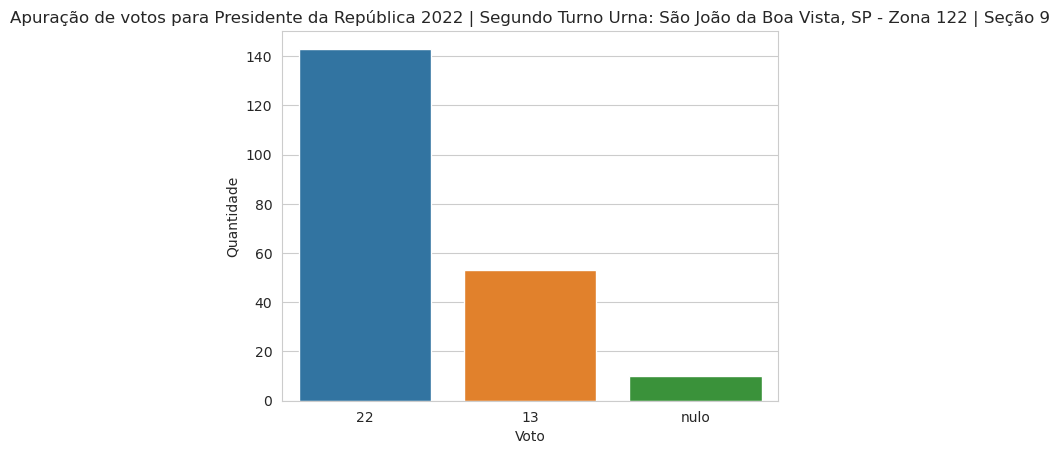

In [42]:
with sns.axes_style("whitegrid"):
  chart = sns.barplot(data=votos_agregados, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_label, ylabel=y_label)

In [43]:
x_column = "voto"
y_column = "percentual"
x_label = "Voto"
y_label = "percentual"

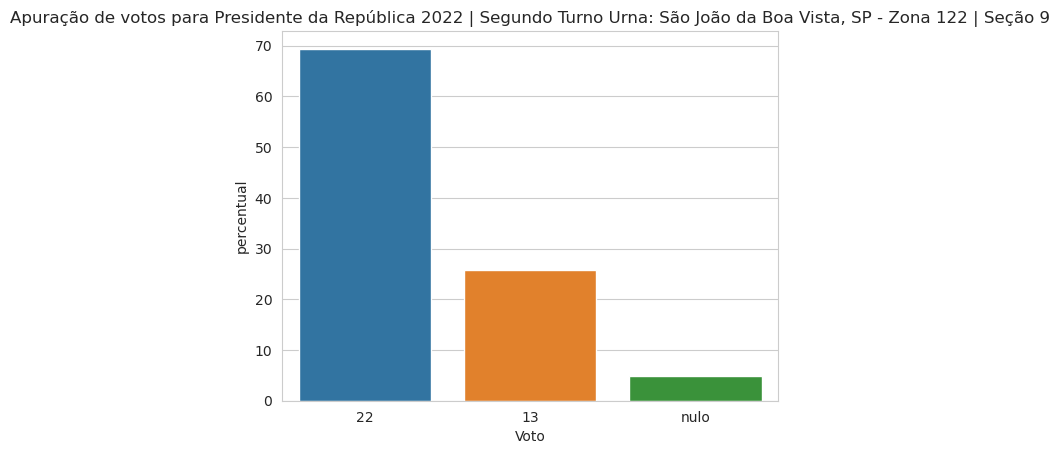

In [44]:
with sns.axes_style("whitegrid"):
  chart = sns.barplot(data=votos_agregados, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_label, ylabel=y_label)

## Conclusão

Os dados obtidos de uma única urna foram recontados e apresentaram os mesmos dados apresentados pelo TSE.

Este mesmo projeto pode ser utilizado para fazer a análise de toda uma seção eleitoral, ou mesmo de todas as urnas to país, para verificar-se a lisura do processo. Todavia, como esta análise foi um exercício didático com dados reais, considerar todos os dados fogem ao escopo e motivação atuais deste autor.

Este código pode ser utilizado para quaisquer finalidades que não comerciais. 

## Referências

- [Documentação técnica do software da urna eletrônica](https://www.tre-mt.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica)
- [Resultados Oficiais das Eleições 2022](https://resultados.tse.jus.br/oficial/app/index.html#/eleicao;e=e545/resultados)
- [Dados da Seção analizada de São João da Boa Vista, SP (urna única)](https://resultados.tse.jus.br/oficial/app/index.html#/eleicao;e=e545;uf=sp;ufbu=sp;mubu=70831;zn=0122;se=0009/dados-de-urna/rdv)

## Cont(r)ate-me 📫:

<p align='center'>
  <a href='https://github.com/jonasaacampos'>
    <img src='https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white'/>
  </a>
  <a href='https://www.linkedin.com/in/jonasaacampos/'>
    <img src='https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white'/>
  </a>
   <a href='https://dev.to/jonasaacampos'>
    <img src='https://img.shields.io/badge/dev.to-0A0A0A?style=for-the-badge&logo=devdotto&logoColor=white'/>
  </a>
    <a href='https://www.buymeacoffee.com/jaac.dev'>
    <img src='https://img.shields.io/badge/Buy_Me_A_Coffee-FFDD00?style=for-the-badge&logo=buy-me-a-coffee&logoColor=black'/>
  </a>
</p>
